In [71]:
from wok.parse import DictionaryParser, IDSParser
from pathlib import Path
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import os

__file__ = Path(os.path.abspath('__file__'))
data_path = __file__.parent/'wok'/'data'
print(data_path)

idsp = IDSParser(data_path=data_path)

#####
chars = {}

temp_ids_chars = ""
for i, (k, v) in enumerate(idsp.ids_score_dict.items(), start=1):
    chars[k] = i
    temp_ids_chars += v['ids'][0]
temp_ids_chars = list(temp_ids_chars)

ids_chars_count = dict(sorted(dict(Counter(temp_ids_chars)).items(), key=lambda x: x[1], reverse=True))

#####
ids_chars = list(ids_chars_count.keys())

/home/shane/workspace/radical-clustering/wok/data
ids_dictionary created
ids_score_dictionary created


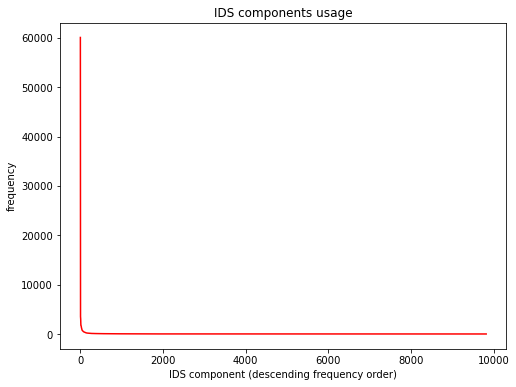

In [72]:
# x'th ids component count = y (x sorted)
indexes = np.arange(len(ids_chars_count))

plt.figure(figsize=(8,6))
plt.plot(indexes, ids_chars_count.values(), 'r-')
plt.title('IDS components usage')
plt.xlabel('IDS component (descending frequency order)')
plt.ylabel('frequency')
plt.show()

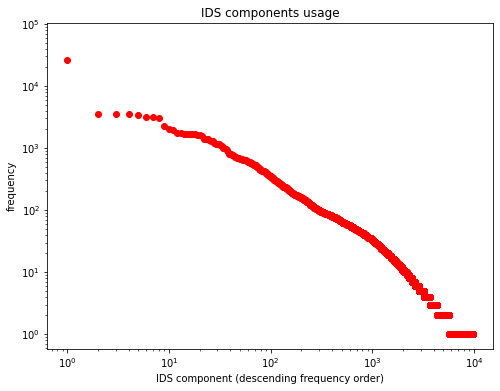

In [73]:
# x'th ids component count = y (x sorted)
indexes = np.arange(len(ids_chars_count))

plt.figure(figsize=(8,6))
plt.plot(indexes, ids_chars_count.values(), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.title('IDS components usage')
plt.xlabel('IDS component (descending frequency order)')
plt.ylabel('frequency')
plt.show()

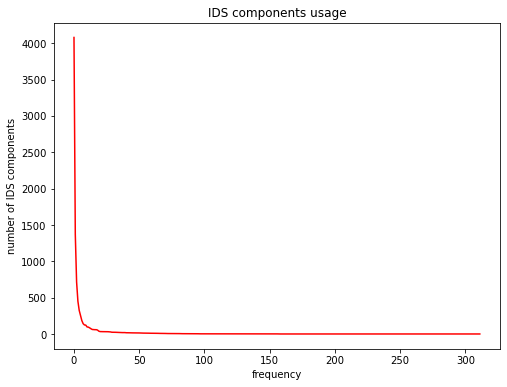

In [74]:
# 10^3 chars where used 10^0(once)
counts = dict(sorted(Counter(ids_chars_count.values()).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(counts))

plt.figure(figsize=(8,6))
plt.plot(indexes, counts.values(), 'r-')
plt.title('IDS components usage')
plt.xlabel('frequency')
plt.ylabel('number of IDS components')
plt.show()

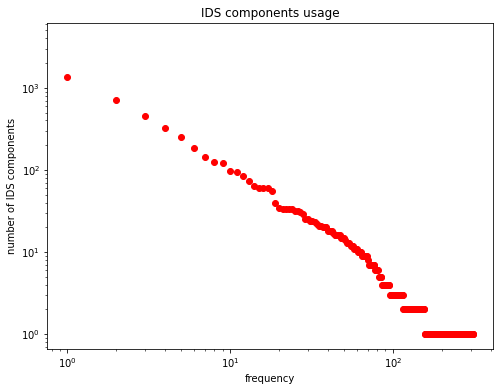

In [75]:
# 10^3 chars where used 10^0(once)
counts = dict(sorted(Counter(ids_chars_count.values()).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(counts))

plt.figure(figsize=(8,6))
plt.plot(indexes, counts.values(), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.title('IDS components usage')
plt.xlabel('frequency')
plt.ylabel('number of IDS components')
plt.show()

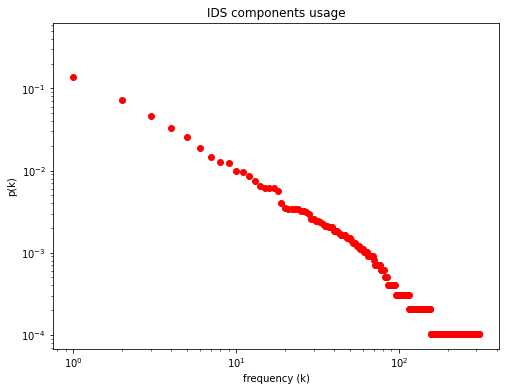

In [76]:
# 10^-1 * 100% of chars where used 10^0(once)
counts = dict(sorted(Counter(ids_chars_count.values()).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(counts))

s = sum(counts.values())

plt.figure(figsize=(8,6))
plt.plot(indexes, list(map(lambda x: x/s, counts.values())), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.title('IDS components usage')
plt.xlabel('frequency (k)')
plt.ylabel('p(k)')
plt.show()

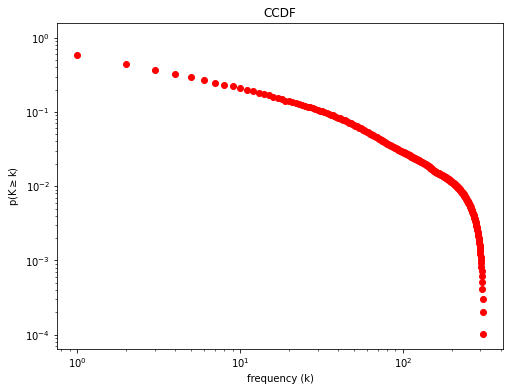

In [77]:
# CCDF

stacked_count = []
for i in range(len(counts.values())):
    stacked_count.append(sum(list(counts.values())[i:]))

s = sum(counts.values())
stacked_count = list(map(lambda x: x/s, stacked_count))

indexes = np.arange(len(counts))

plt.figure(figsize=(8,6))
plt.plot(indexes, stacked_count, 'ro')
plt.xscale('log')
plt.yscale('log')
plt.title('CCDF')
plt.xlabel('frequency (k)')
plt.ylabel(r'p(K$\geq$k)')
plt.show()

In [78]:
print('chars', len(chars))
print('ids_chars', len(ids_chars))

chars 88937
ids_chars 9821


In [79]:
max_score = -1
for k, v in idsp.ids_score_dict.items():
    for i in v['score']:
        if i > max_score:
            max_score = i
print(max_score)

832.0


In [80]:
tokens_dict = {}
tokens = "⿰⿱⿲⿳⿴⿵⿶⿷⿸⿹⿺⿻"
for t in tokens:
    tokens_dict[t] = {'ids': [t], 'score': [max_score]}

d = tokens_dict
d.update(idsp.ids_score_dict)

register = dict(zip(d.keys(), range(1, len(d.keys())+1)))

In [81]:
with open('ids.net', 'w') as f:
    f.write(f"*Vertices\t{len(d)}\n")
    for c, i in register.items():
        f.write(f"{i}\t\"{hex(ord(c))}\"\n")
    f.write(f"*Edges\n")
    for k, v in idsp.ids_score_dict.items():
        for ids, score in zip(v['ids'], v['score']):
            if k == ids:
                continue
            else:
                for ids_c in ids:
                    f.write(f"{register[k]}\t{register[ids_c]}\t{score/len(ids)}\n")

In [82]:
with open('ids_giant_louvain.clu', 'r') as f:
    f = list(f.readlines())[1:]
    f = list(map(lambda x: x.strip(), f))

# with open('ids_giant_vos.clu', 'r') as f:
#     f = list(f.readlines())[1:]
#     f = list(map(lambda x: x.strip(), f))

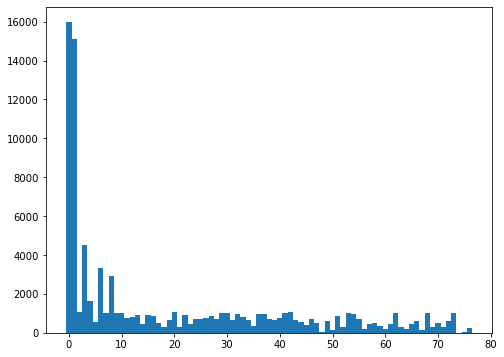

In [83]:
# cluster size (1~75)
d = dict(Counter(f))
indexes = np.arange(len(d))

plt.figure(figsize=(8,6))
plt.bar(indexes, d.values(), width=1)
plt.show()

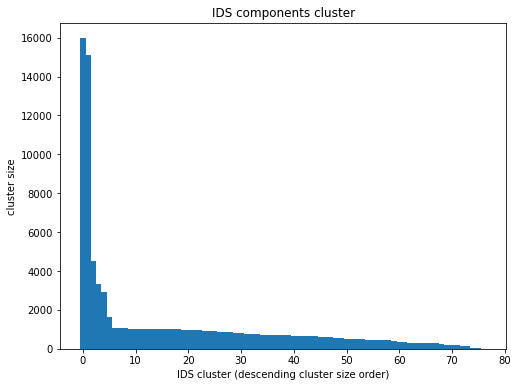

In [84]:
d = dict(sorted(dict(Counter(f)).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(d))

plt.figure(figsize=(8,6))
plt.bar(indexes, d.values(), width=1)
plt.title('IDS components cluster')
plt.xlabel('IDS cluster (descending cluster size order)')
plt.ylabel('cluster size')
plt.show()

In [85]:
# ==============================================================================
#  Final partition after additional refinement
# ==============================================================================
#  Number of Clusters: 77
#  Modularity: 0.399243

#  Maximum Number of Levels in each Iteration reached:     5
#  Maximum Number of Repetitions in each Level reached:    8

print("Number of clusters")
print(len(d))
print()

print("Average size of clusters")
print(sum(d.values()) / len(d))
print()

print("Average size of clusters (80%) (10-80-10)")
print(sum(list(d.values())[round(len(d)*0.1):-round(len(d)*0.1)]) / len(d))
print()

print("Max/min size of clusters")
print(list(d.values())[0], list(d.values())[-1])

Number of clusters
77

Average size of clusters
1153.8961038961038

Average size of clusters (80%) (10-80-10)
548.1948051948052

Max/min size of clusters
15975 4


In [86]:
cluster_dict = {}
for ids_c, cluster_id in zip(register, f):
    if cluster_id in cluster_dict:
        cluster_dict[cluster_id].append(ids_c)
    else:
        cluster_dict[cluster_id] = [ids_c]

In [88]:
d_asc = dict(sorted(dict(Counter(f)).items(), key=lambda x: x[1]))
print(d_asc)

{'75': 4, '49': 29, '76': 65, '68': 150, '51': 152, '61': 188, '57': 191, '65': 204, '77': 272, '22': 273, '64': 293, '53': 302, '70': 304, '72': 304, '19': 317, '36': 329, '60': 365, '46': 395, '24': 437, '15': 462, '62': 472, '58': 473, '66': 474, '18': 499, '48': 507, '71': 524, '59': 528, '6': 549, '45': 557, '67': 584, '73': 586, '50': 619, '40': 647, '44': 647, '32': 660, '35': 672, '20': 675, '26': 688, '39': 692, '56': 697, '25': 714, '29': 725, '47': 727, '12': 742, '27': 742, '41': 753, '34': 817, '13': 823, '28': 839, '17': 844, '52': 860, '23': 905, '14': 908, '16': 909, '33': 959, '37': 959, '55': 981, '38': 991, '30': 994, '10': 995, '8': 1009, '31': 1014, '42': 1014, '11': 1016, '74': 1025, '63': 1026, '54': 1027, '69': 1032, '43': 1058, '3': 1063, '21': 1084, '5': 1656, '9': 2932, '7': 3322, '4': 4527, '2': 15097, '1': 15975}
